In [2]:
# -*- coding: utf-8 -*-
from google.colab import files
uploaded = files.upload()

Saving nikkei-225-index-historical-chart-data.csv to nikkei-225-index-historical-chart-data.csv


Polynomial Regression

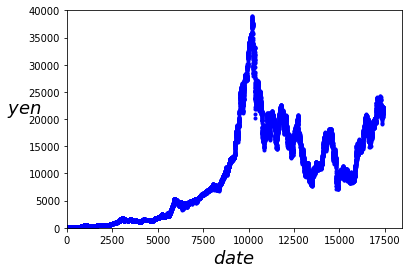

In [9]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt

# open nikkei csv file　
fp=open("nikkei-225-index-historical-chart-data.csv", "r", encoding='cp932')

b=[]
# skip header part
for line in fp:
  tmp=line.split(",")
  if tmp[0]=="date":
    break
# read nikkei stock average
for line in fp:
    tmp=line.split(",")
    b.append(float(tmp[-1].strip()))
#print(b)
nikkei=np.array(b)

# check data
n = len(nikkei)
x_base = np.array(np.arange(0, len(nikkei), 1))
#print(x_base)
#print(x_base.shape)

y_base = nikkei
#print(y_base)
#print(y_base.shape)

m=100 # data size
X=x_base
y=y_base
plt.plot(X, y, "b.")
plt.xlabel("$date$", fontsize=18)
plt.ylabel("$yen$", rotation=0, fontsize=18)
plt.axis([0, n+1000, 0, 40000])
plt.show()

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_features=PolynomialFeatures(degree=2, include_bias=False)
X_poly=poly_features.fit_transform(X)
X[0]
X_poly[0]
lin_reg=LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

ValueError: ignored

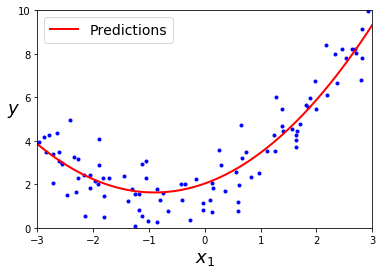

In [0]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()


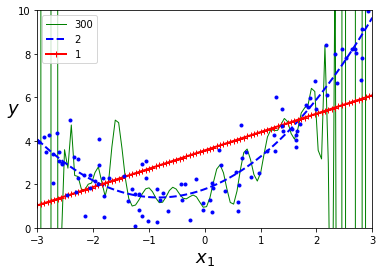

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()